In [1]:
# in this we will use ml models to predict heating load and cooling load

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor

# import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# import train test split
from sklearn.model_selection import train_test_split

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read data
df = pd.read_csv('data/ENB2012_data_new.csv')

In [9]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


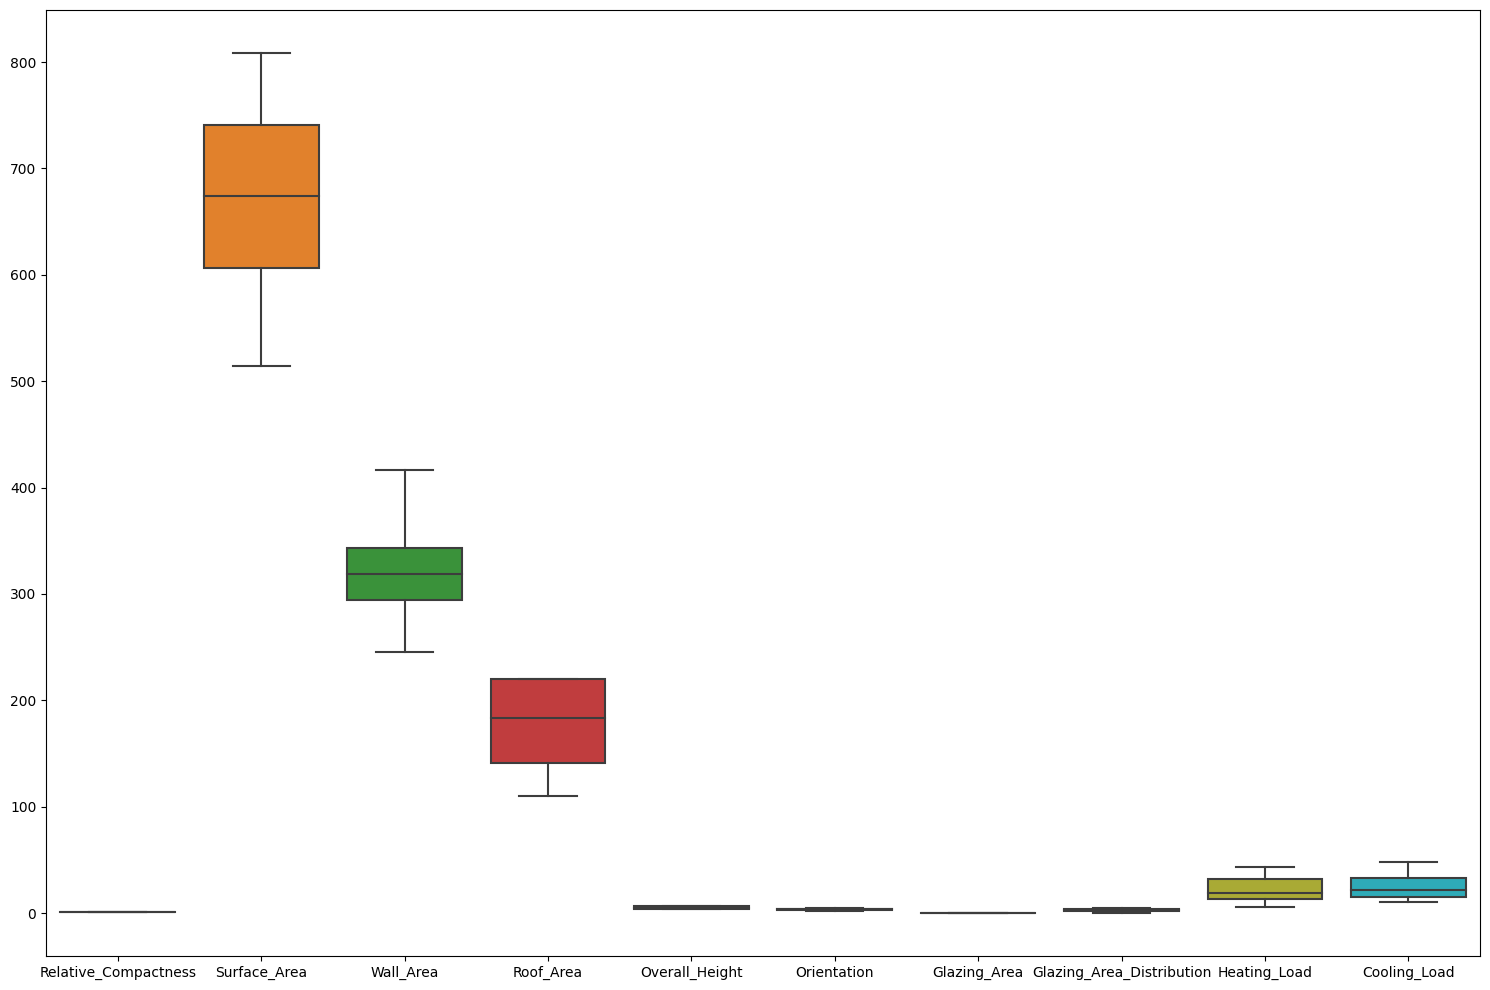

In [6]:
# check if data is scaled or not using boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.tight_layout()
plt.show()


In [11]:
# data is not scaled we will use different scaler on input features only and plot boxplot for each and compare them

# split data into input and output features
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1)
y1 = df['Heating_Load']
y2 = df['Cooling_Load']

In [12]:
# apply standard scaler
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X)
X_scaled_1 = pd.DataFrame(X_scaled_1, columns=X.columns)

# apply minmax scaler
scaler = MinMaxScaler()
X_scaled_2 = scaler.fit_transform(X)
X_scaled_2 = pd.DataFrame(X_scaled_2, columns=X.columns)

# apply robust scaler
scaler = RobustScaler()
X_scaled_3 = scaler.fit_transform(X)
X_scaled_3 = pd.DataFrame(X_scaled_3, columns=X.columns)

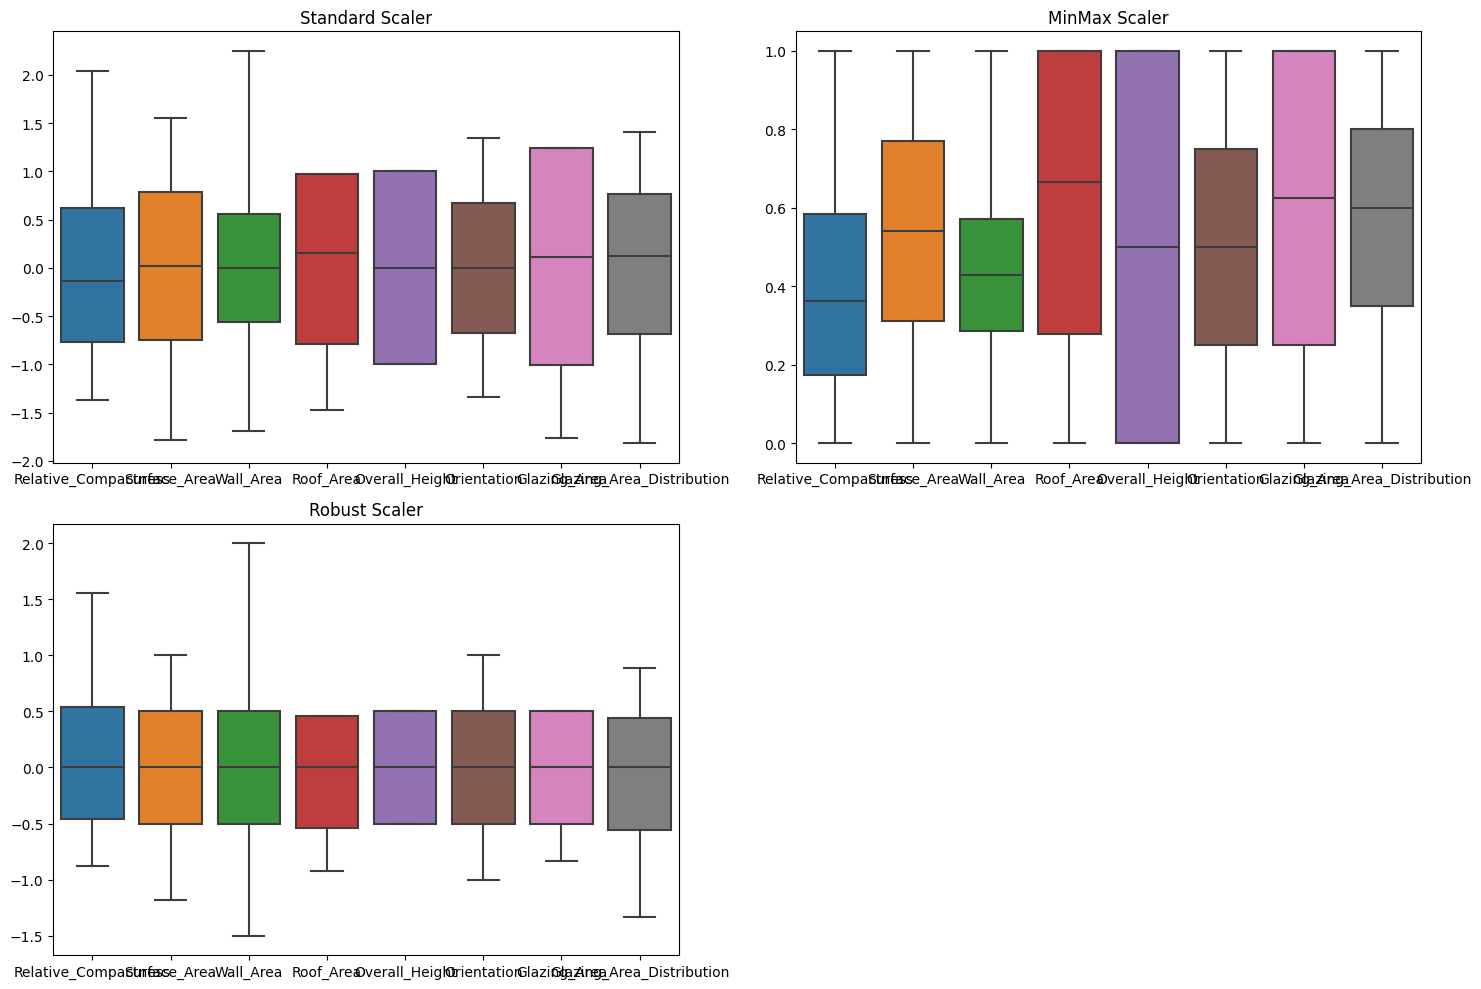

In [13]:
# plot boxplot for each scaler using subplots
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(data=X_scaled_1)
plt.title('Standard Scaler')
plt.subplot(2, 2, 2)
sns.boxplot(data=X_scaled_2)
plt.title('MinMax Scaler')
plt.subplot(2, 2, 3)
sns.boxplot(data=X_scaled_3)
plt.title('Robust Scaler')
plt.tight_layout()
plt.show()

# For Heating_load

In [18]:
# split data into train and test
X_train_heat, X_test_heat, y_train_heat, y_test_heat = train_test_split(X_scaled_3, y1, test_size=0.2, random_state=42)

In [15]:
# create a function to train and test model
def evaluate_models(models, x_train, x_test, y_train, y_test):
    results = []
    
    for model in models:
        model_name = type(model).__name__
        
        # Train the model
        model.fit(x_train, y_train)
        
        # Predict on test set
        y_pred = model.predict(x_test)
        
        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Append results to list
        results.append((model_name, mse, mae, r2))
    
    # Create DataFrame from results
    df_results = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE', 'R2 Score'])
    
    return df_results

In [16]:
# create a list of models
models = [
    LinearRegression(),
    RandomForestRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    MLPRegressor()
]

In [19]:
# call function
result = evaluate_models(models, X_train_heat, X_test_heat, y_train_heat, y_test_heat)

In [20]:
result

,Model,MSE,MAE,R2 Score
0,LinearRegression,9.153208,2.182073,0.912185
1,RandomForestRegressor,0.255833,0.363791,0.997546
2,SVR,7.816608,1.923759,0.925008
3,DecisionTreeRegressor,0.400343,0.434247,0.996159
4,KNeighborsRegressor,3.367418,1.296182,0.967693
5,GradientBoostingRegressor,0.266474,0.386747,0.997443
6,AdaBoostRegressor,3.605508,1.556540,0.965409
7,Ridge,9.310862,2.191494,0.910672
8,Lasso,19.362056,3.304149,0.814241
9,ElasticNet,30.657284,4.433642,0.705876


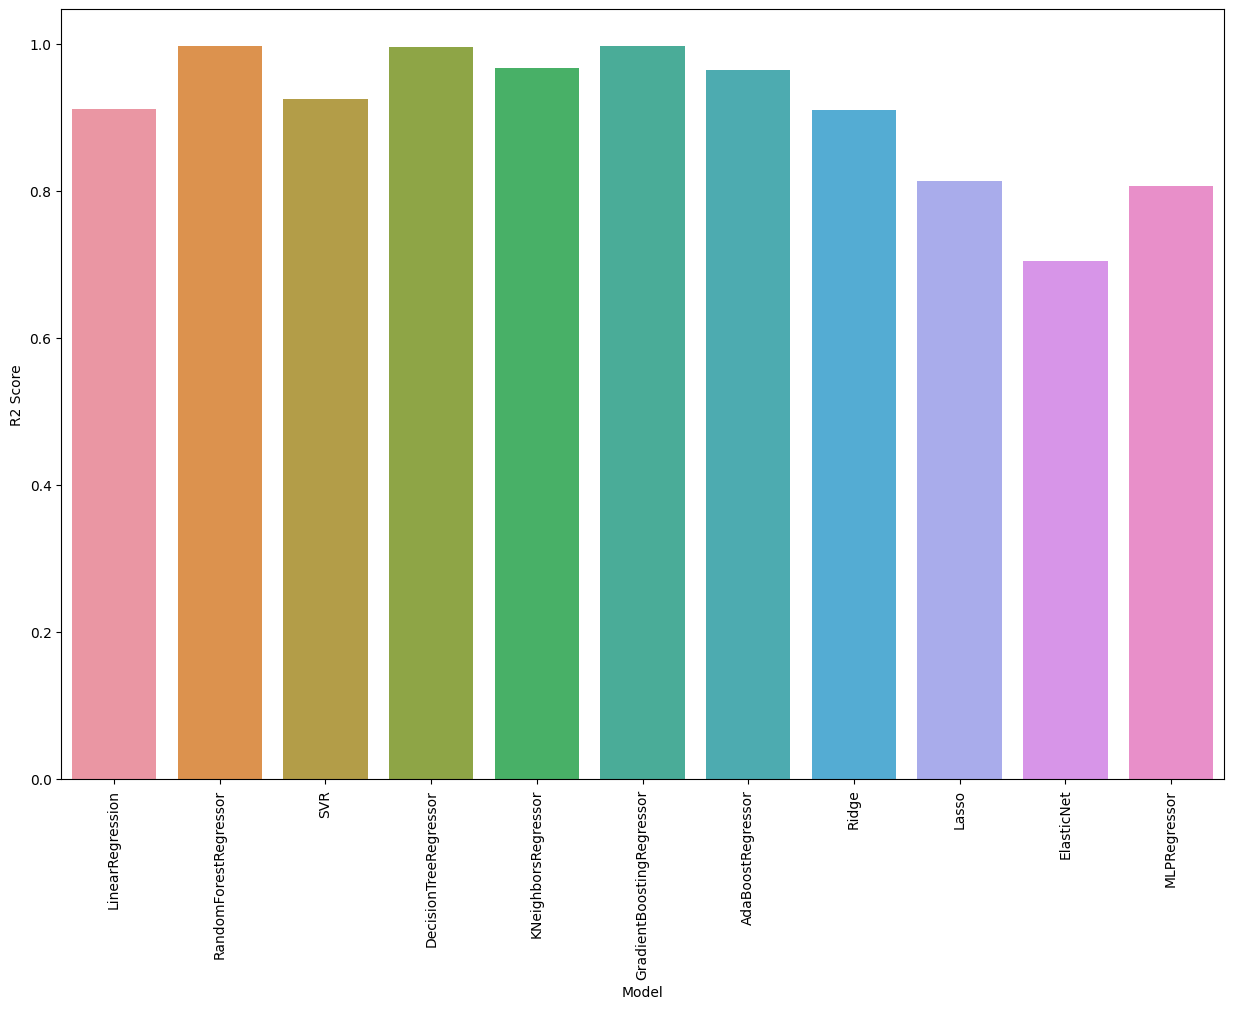

In [21]:
# plot barplot for each model
plt.figure(figsize=(15, 10))
sns.barplot(x='Model', y='R2 Score', data=result)
plt.xticks(rotation=90)
plt.show()

# For Cooling load

In [23]:

# split data into train and test
X_train_cool, X_test_cool, y_train_cool, y_test_cool = train_test_split(X_scaled_3, y2, test_size=0.2, random_state=42)

In [24]:
# call function
result_cool = evaluate_models(models, X_train_cool, X_test_cool, y_train_cool, y_test_cool)

In [25]:
result_cool

,Model,MSE,MAE,R2 Score
0,LinearRegression,9.893428,2.195295,0.893226
1,RandomForestRegressor,3.142709,1.097669,0.966082
2,SVR,10.095237,2.118978,0.891048
3,DecisionTreeRegressor,4.130558,1.152792,0.955421
4,KNeighborsRegressor,3.531488,1.349091,0.961887
5,GradientBoostingRegressor,2.293052,1.057285,0.975252
6,AdaBoostRegressor,5.641512,1.784427,0.939114
7,Ridge,10.087103,2.214066,0.891135
8,Lasso,20.213753,3.452219,0.781844
9,ElasticNet,29.679905,4.304216,0.679681


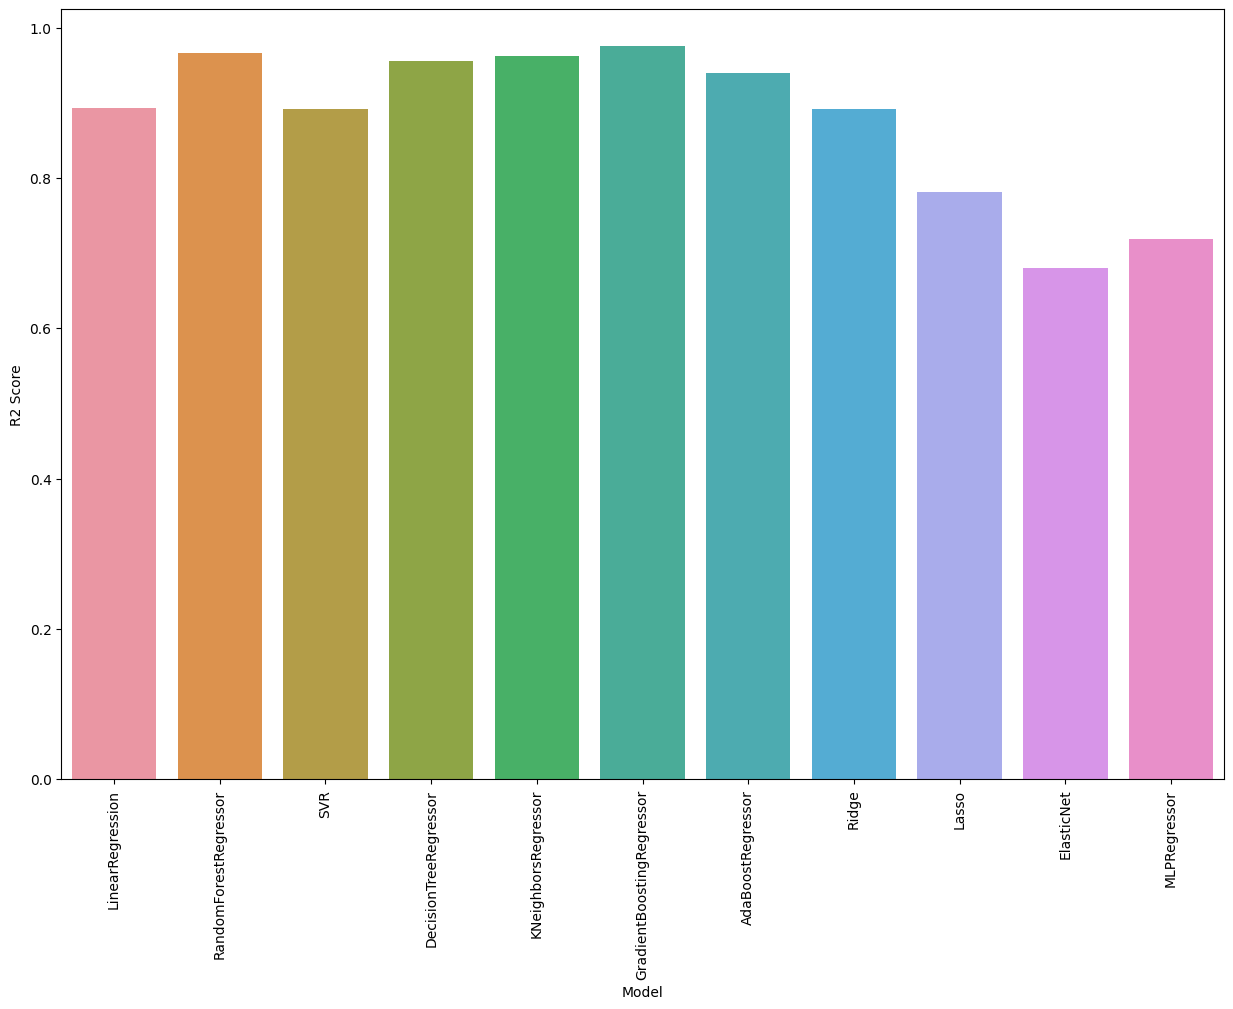

In [26]:
# plot barplot for each model
plt.figure(figsize=(15, 10))
sns.barplot(x='Model', y='R2 Score', data=result_cool)
plt.xticks(rotation=90)
plt.show()

In [27]:
# RandomForestRegressor is giving best result for heating load and good result for cooling load. we will use this model for prediction

# GradientBoosting model is Good.